<a href="https://colab.research.google.com/github/ecomunick/omdena/blob/main/EDA_project/notebook/world_happiness_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**World happiness report 2022**

✨The World Happiness Report is a landmark survey of the state of global happiness ✨

The happiness scores and rankings use data from the Gallup World Poll. The columns following the happiness score estimate the extent to which each of six factors:
*   Economic production
*   Social support
*   Life expectancy
*   Freedom
*   Absence of corruption
*   Generosity











## **Data Dictionary**

Information is presented for 146 countries and 12 indicators of living standards and happiness. Let's describe our feature space.

*   **RANK** - number in the ranking of countries.
*   **Country** - researched country.
*   **Happiness score** - an index that reflects the well-being of people and the state of the environment in different countries of the world, which was proposed by the New Economics Foundation in July 2006.
*   **Whisker-high and Whisker-low** - Whisker (low) is the quartile (real number between 0 and 10) from which the happiness score is calculated.
*   **Dystopia (1.83) + residual** - It has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. ... Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia
*   **Explained by: GDP per capita** is the ratio of GDP to the population of the country, which shows how much of the gross product produced in the country in a year and expressed in value terms, falls on one inhabitant of this country.
*   **Explained by: Social support** is a form of expression of the social policy of the state, aimed at providing social assistance to needy citizens.
*   **Explained by: Healthy life expectancy** - Healthy life expectancy is an indicator for calculating which life expectancy must be adjusted for the health of the individual. This indicator represents the period of time (years, months, days) during which an individual is expected to have a certain state of health, with a constant level of mortality and morbidity.
*   **Explained by: Freedom to make life choices** - the right of a person to freely express his opinion. This right includes freedom to hold opinions and freedom to receive and impart information and ideas without any interference from public authorities and regardless of frontiers.
*   **Explained by: Generosity** - The main feature of charity is the voluntary choice of the type, time and place, as well as the content of (targeted) assistance. Charity is distinguished as a manifestation of compassion for one's neighbor and the moral duty of the possessor to rush to the aid of the have-not.
*   **Explained by: Perceptions of corruption** - an index compiled by the international non-governmental organization Transparency International to reflect the assessment of the level of perception of corruption by analysts and entrepreneurs on a 100-point scale. Compiled annually since 1995.


## Businness Questions:

1. What are the 3 happiest countries in 2022
2. What are the 10 happiest countries in 2021
3. What are the GDPs of the 10 happiest countries. Does the GPD corroborate the happiest countries?
4. What is the perception of freedom in the 5 happiest countries
5. What is the perception of social support in the 5 happiest countries
6. What is the perception of corruption in the 5th happiest countries
7. What are the 10 least happy countries in 2021
8. What is the perception of freedom in the 5 least happy countries
9. What is the perception of social support in the 5 least happy countries
10. What is the perception of corruption in the 5th least happy countries


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
URL = 'https://raw.githubusercontent.com/ecomunick/omdena/main/EDA_project/data/World%20Happiness%20Report%202022.csv'

df = pd.read_csv(URL, sep=",")
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [43]:
# Let's arrange our columns
df.rename(columns = {'Dystopia (1.83) + residual':'Dystopia',
                     'Explained by: GDP per capita':'GDP per capita',
                     'Explained by: Social support':'Social support',
                     'Explained by: Healthy life expectancy':'Healthy life expectancy',
                     'Explained by: Freedom to make life choices':'Freedom to choices',
                     'Explained by: Generosity':'Generosity',
                     'Explained by: Perceptions of corruption':'Perceptions of corruption'}, inplace = True)

In [44]:
df.head(10)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia,GDP per capita,Social support,Healthy life expectancy,Freedom to choices,Generosity,Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
5,6,Luxembourg*,7.404,7.501,7.307,2.042,2.209,1.155,0.790,0.700,0.120,0.388
6,7,Sweden,7.384,7.454,7.315,2.003,1.920,1.204,0.803,0.724,0.218,0.512
7,8,Norway,7.365,7.440,7.290,1.925,1.997,1.239,0.786,0.728,0.217,0.474
8,9,Israel,7.364,7.426,7.301,2.634,1.826,1.221,0.818,0.568,0.155,0.143
9,10,New Zealand,7.200,7.279,7.120,1.954,1.852,1.235,0.752,0.680,0.245,0.483


In [45]:
# see how many lines and columns (variables) has the dataset
df.shape

(146, 12)

In [46]:
# see if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RANK                       146 non-null    int64  
 1   Country                    146 non-null    object 
 2   Happiness score            146 non-null    float64
 3   Whisker-high               146 non-null    float64
 4   Whisker-low                146 non-null    float64
 5   Dystopia                   146 non-null    float64
 6   GDP per capita             146 non-null    float64
 7   Social support             146 non-null    float64
 8   Healthy life expectancy    146 non-null    float64
 9   Freedom to choices         146 non-null    float64
 10  Generosity                 146 non-null    float64
 11  Perceptions of corruption  146 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 13.8+ KB


In [47]:
# just to confirm:
# cool, looks like there are no NAs values
df.isnull().sum()

RANK                         0
Country                      0
Happiness score              0
Whisker-high                 0
Whisker-low                  0
Dystopia                     0
GDP per capita               0
Social support               0
Healthy life expectancy      0
Freedom to choices           0
Generosity                   0
Perceptions of corruption    0
dtype: int64

In [48]:
# describe to see basic statistics of dataset
df.describe()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia,GDP per capita,Social support,Healthy life expectancy,Freedom to choices,Generosity,Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.290661,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,73.500000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,109.750000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,146.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


In [49]:
ten_happy = subset = df.iloc[:10, :]
ten_happy.head(12)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia,GDP per capita,Social support,Healthy life expectancy,Freedom to choices,Generosity,Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
5,6,Luxembourg*,7.404,7.501,7.307,2.042,2.209,1.155,0.790,0.700,0.120,0.388
6,7,Sweden,7.384,7.454,7.315,2.003,1.920,1.204,0.803,0.724,0.218,0.512
7,8,Norway,7.365,7.440,7.290,1.925,1.997,1.239,0.786,0.728,0.217,0.474
8,9,Israel,7.364,7.426,7.301,2.634,1.826,1.221,0.818,0.568,0.155,0.143
9,10,New Zealand,7.200,7.279,7.120,1.954,1.852,1.235,0.752,0.680,0.245,0.483


In [50]:
# seeing how data are correlated with each other, in special for our preliminars questions:

# What are the 3rd, 10th happiest country in 2022
# What are the GDPs of the 10 happiest countries. Does the GPD corroborate the happiest countries?
# The freedom, perception of social support and perception of corruption in the 5th happiest countries?
# What are the 10th least happy countries in 2022
# The freedom, perception of social support and perception of corruption in the 5th least happy countries

#df.corr()
ten_happy.corr()["Happiness score"]

<ipython-input-50-81520c8731f6>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ten_happy.corr()["Happiness score"]


RANK                        -0.937617
Happiness score              1.000000
Whisker-high                 0.997187
Whisker-low                  0.997355
Dystopia                     0.550388
GDP per capita               0.016572
Social support               0.406881
Healthy life expectancy      0.056840
Freedom to choices           0.418560
Generosity                  -0.427596
Perceptions of corruption    0.190464
Name: Happiness score, dtype: float64

In [51]:
df.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [52]:
# See top 10 happy countries
df['Country'][:10]

0        Finland
1        Denmark
2        Iceland
3    Switzerland
4    Netherlands
5    Luxembourg*
6         Sweden
7         Norway
8         Israel
9    New Zealand
Name: Country, dtype: object

In [53]:
# See the 10 least happy countries
df['Country'].tail(10)

136          Zambia
137          Malawi
138        Tanzania
139    Sierra Leone
140        Lesotho*
141       Botswana*
142         Rwanda*
143        Zimbabwe
144         Lebanon
145     Afghanistan
Name: Country, dtype: object

In [54]:
#Dyostopia by country
df.groupby('Country')['Dystopia'].mean()

Country
Afghanistan    1.263
Albania        1.718
Algeria        1.744
Argentina      1.891
Armenia        1.654
               ...  
Venezuela      2.790
Vietnam        1.735
Yemen*         1.561
Zambia         1.135
Zimbabwe       0.548
Name: Dystopia, Length: 146, dtype: float64

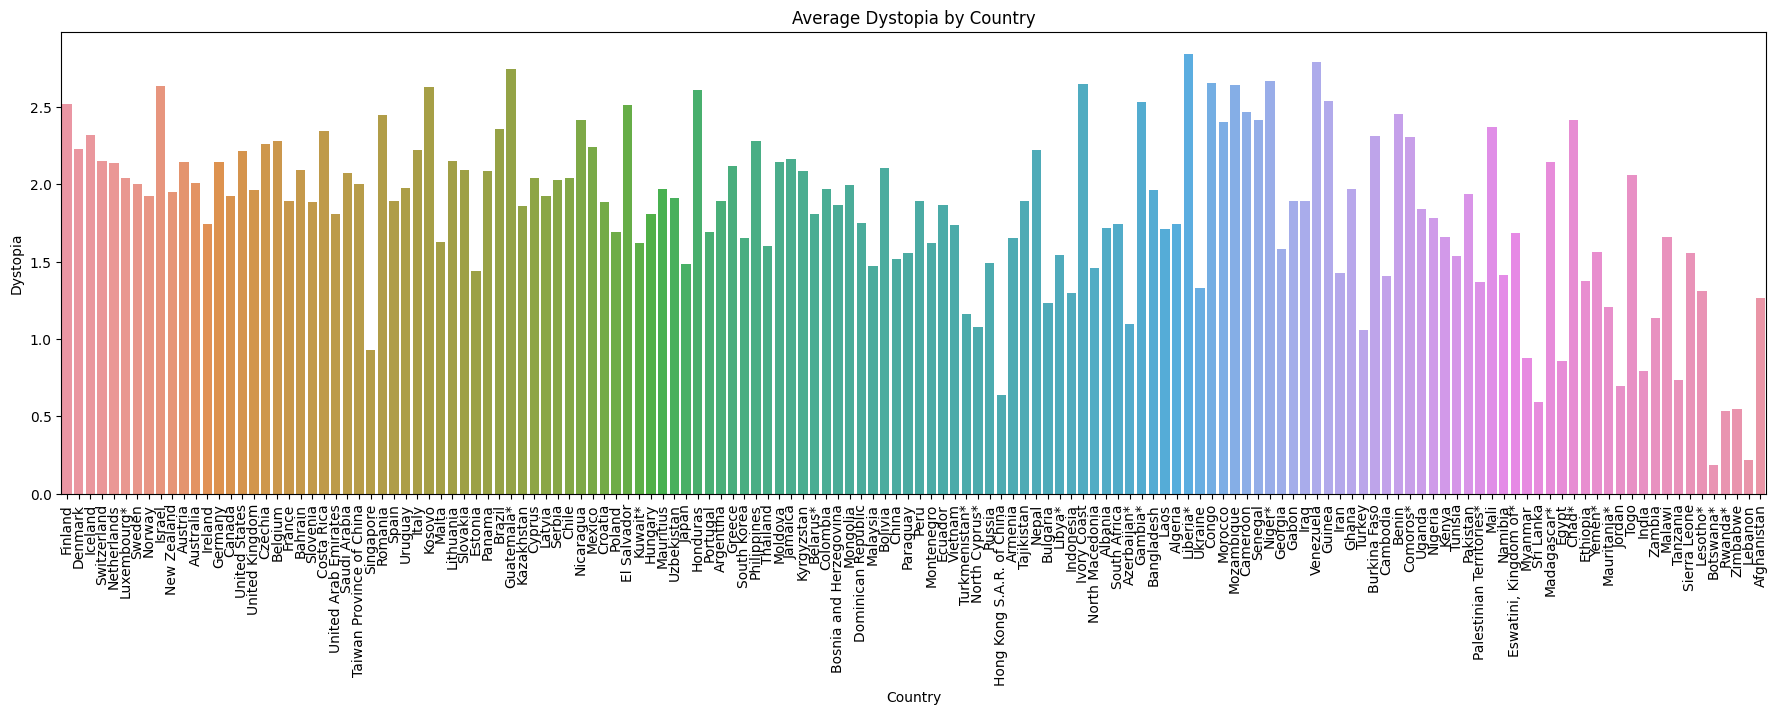

In [65]:
#import plotly.express as px
#Dyostopia by country
#bar_chart = px.bar(df, x='Country', y='Dystopia', title='Average Dyostopia by Country')
#bar_chart.show()




#Dyostopia by country
# Create a bar chart using Seaborn
plt.figure(figsize=(22, 6))  # Adjust the figure size if needed
sns.barplot(data=df, x='Country', y='Dystopia')

# Add a title
plt.title('Average Dystopia by Country')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the chart
plt.show()


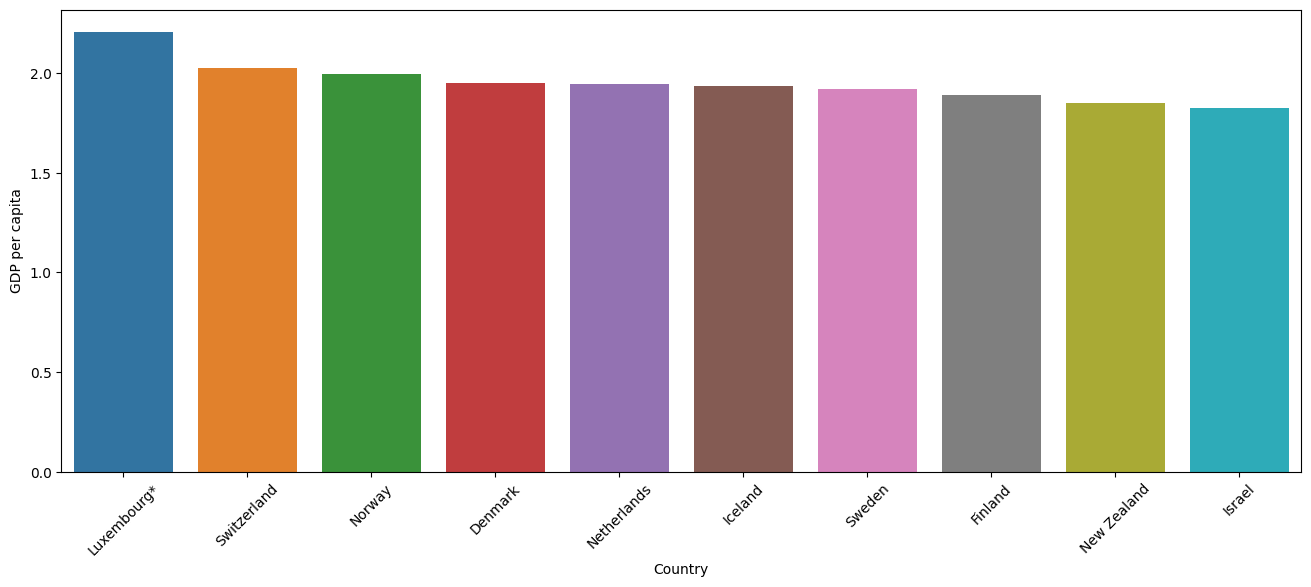

In [67]:
# Top 10 Countries by GDP per capita
plt.figure(figsize=(16,6))
sns.barplot(x='Country',
            y='GDP per capita',
            #data=df.nlargest(10, 'GDP per capita'))
            data=ten_happy.nlargest(10, 'GDP per capita'))
#plt.grid()
plt.xticks(rotation = 45)
plt.show()

In [75]:
#GDP by country
#ten_happy.groupby('Country')['GDP per capita'].mean()
ten_happy[['Country', 'GDP per capita']]

,Country,GDP per capita
0,Finland,1.892
1,Denmark,1.953
2,Iceland,1.936
3,Switzerland,2.026
4,Netherlands,1.945
5,Luxembourg*,2.209
6,Sweden,1.920
7,Norway,1.997
8,Israel,1.826
9,New Zealand,1.852


In [ ]:
#GDP by country
bar_chart = px.bar(df, x='Country', y='GDP per capita', title='GDP by Country')
bar_chart.show()

In [ ]:
#plt.figure(figsize= (10,7))
#plt.hist(df['Happiness score'], bins = 20, edgecolor = 'black')
#plt.xlabel('Happiness score')
#plt.ylabel('Frequency')
#plt.title('Happiness score Distribution')
#plt.show()

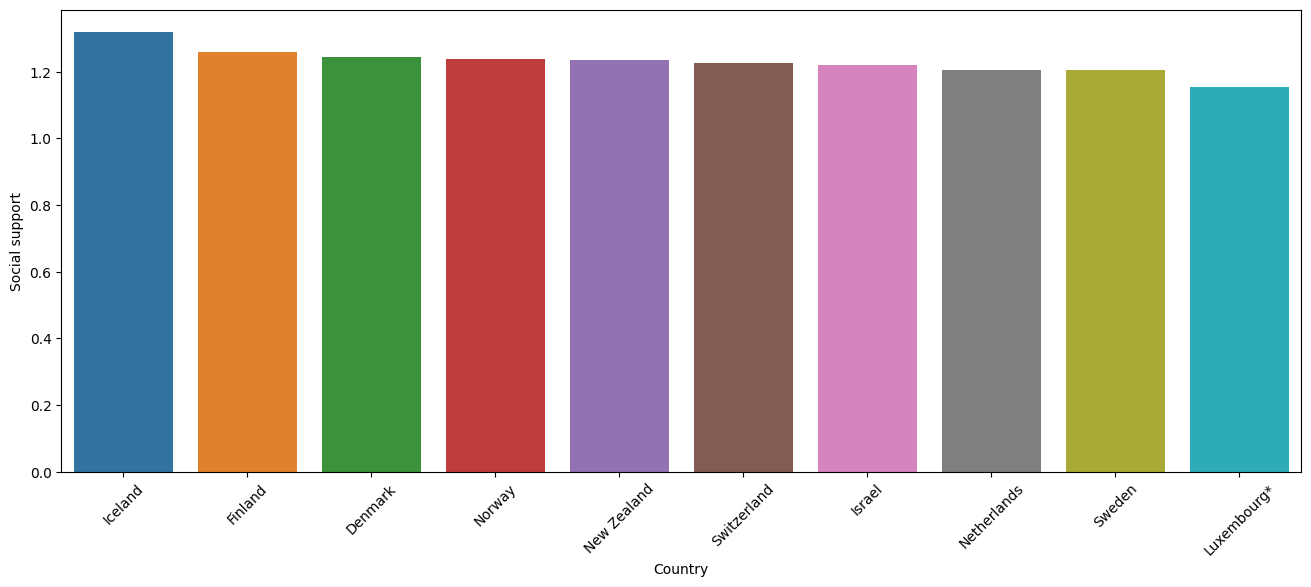

In [80]:
# Top 10 Countries by Social support
plt.figure(figsize=(16,6))
sns.barplot(x='Country',
            y='Social support',
            data=ten_happy.nlargest(10, 'Social support'))
#plt.grid()
plt.xticks(rotation = 45)
plt.show()

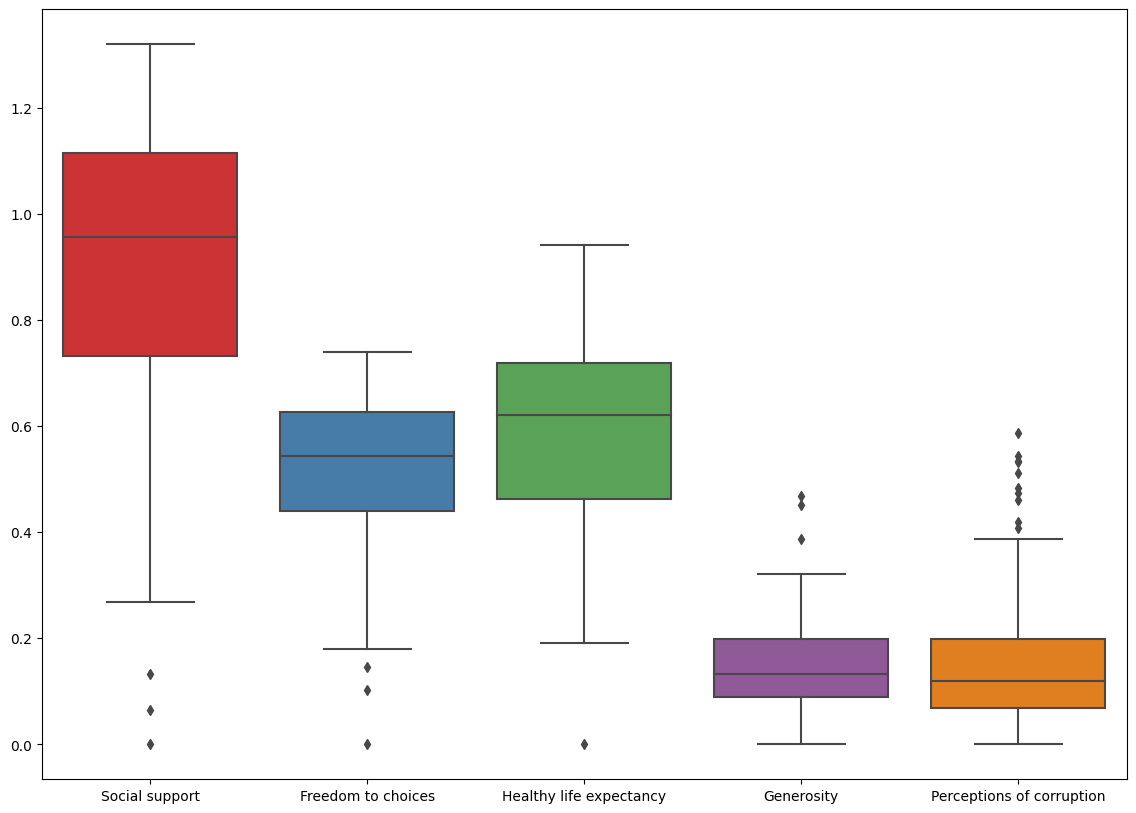

In [82]:
# Distribution of factors with Boxplot
list_features1 = ["Social support", "Freedom to choices","Healthy life expectancy", "Generosity", "Perceptions of corruption"]
plt.figure(figsize = (14,10))
sns.boxplot(data = df.loc[:, list_features1], orient = "v", palette = "Set1")
plt.show()

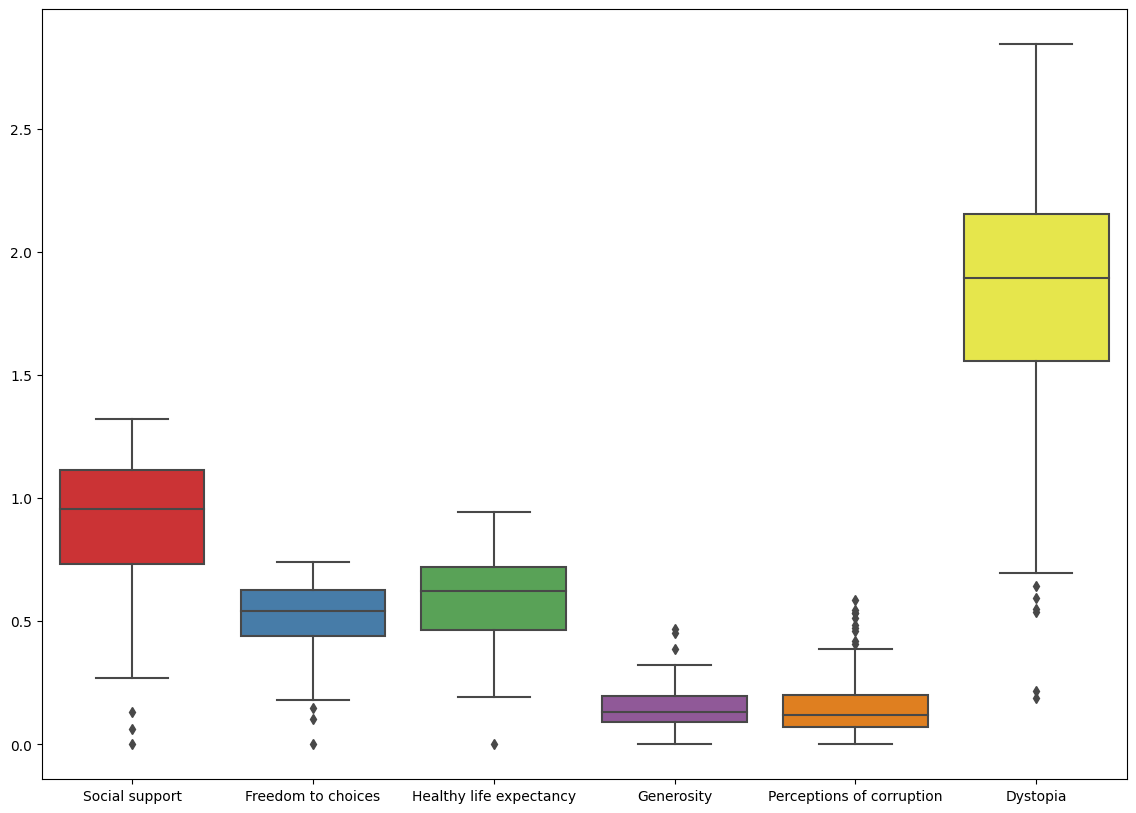

In [83]:
# Distribution of factors comparing also with Dystopia -- with Boxplot
list_features1 = ["Social support", "Freedom to choices","Healthy life expectancy", "Generosity", "Perceptions of corruption", "Dystopia"]
plt.figure(figsize = (14,10))
sns.boxplot(data = df.loc[:, list_features1], orient = "v", palette = "Set1")
plt.show()